In [1]:
from google.colab import files
uploaded = files.upload()

Saving RawData.csv to RawData.csv


>  Main Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1- Main Functions (Pipeline)

## a) Printable Functions

### (i) DF Shape

In [3]:
def shape(df):
  # DataFrame shape
  print('-='*30)
  print('|\t\t\t| DF Shape |\t\t\t')
  print('|')
  print(f'|  Rows: {df.shape[0]}\n|   X\n|  Columns: {df.shape[1]}')
  print('-='*30)
  return None

### (ii) DF Info

In [4]:
def info(df):
  print(df.info(verbose=True))
  return None

### (iii) Nulls Quantity

In [5]:
def nulls_qtd(df):
  print(df.isna().sum())
  return None

### (iv) Data Description

In [6]:
def describe(df, perc, drop_list = None):
  if drop_list == None:
    df.select_dtypes(include='number').describe(percentiles = perc)
  else:
    df.select_dtypes(include='number').drop(drop_list, axis=1).describe(percentiles = perc)
  return None

## b) Transformable Functions

### (i) Changing Columns Dtype

In [7]:
# Changes the variable type
def change_type(df, feature, ast = object):
  """
  df: Pandas DataFrame to be modified
  feature: a list or tuple of columns to be modified
  ast: set column astype (if not declared, automatically it will be setted as an object); must be a list or a tuple
  """
  try:
    len(feature) > 1
    len(ast) > 1
  except:
    print('function developed for multiple features changes.. You must input a list of each one')
    

  assert len(feature) == len(ast)

  for f, a in zip(feature, ast):
    f = str(f)
    a = str(a)
    df[f] = df[f].astype(a)
  return df

### (ii) Selecting DF Columns

In [8]:
def select_columns(df, columns_names_list):
  df_new = df[columns_names_list]
  return df_new

### (iii) Splitting data into train and test

In [9]:
def split_train_test(X, y, perc = 0.2):
  """
  X: x's variables
  y: target variable (system response)
  perc: test data percentage (decimal value; default = 0.2 = 20% of data)
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # Resets all DFs indexes
  X_train.reset_index(drop = True, inplace = True)
  X_test.reset_index(drop = True, inplace = True)
  y_train.reset_index(drop = True, inplace = True)
  y_test.reset_index(drop = True, inplace = True)

  return X_train, X_test, y_train, y_test

## c) Mathematical and Statistics Functions

### (i) Data Scaling

In [10]:
# Criar a função para o escalonamento dos dados
def feat_scale(X):

  # Calcular a média de todas as variáveis
  mu = np.mean(X, axis = 0)

  # Calcular o devio padrão de todas as variáveis
  sigma = np.std(X, axis=0, ddof=1) # ddof=1 calcula o desvio padrão amostral

  # Fazer os escalonamento das variáveis
  xNorm = (X - mu)/sigma

  return xNorm

### (ii) OLS Equation

In [11]:
def ols_formula(df, dependent_var, *excluded_rows):

  # Listar o nome das colunas do dataframe
  dfCols = list(df.columns.values)

  # Remover a variável dependente
  dfCols.remove(dependent_var)

  # Remover as variáveis excluídas
  for col in excluded_rows:
    dfCols.remove(col)

  # Retornar a fórmula
  return dependent_var + ' ~ ' + ' + '.join(dfCols)

### (iii) Gradient-Descent

In [12]:
def funcao_perda(X, y, beta):

  """
  X é a matriz com os regressores (m x n).
  y é a série com a resposta (1 x m).
  beta é a série dos parâmetros (1 x n).
  """

  # Previsão da resposta
  pred = X.dot(beta) #-> produto escalar

  # Calcular os erros de previsão
  res = np.subtract(pred, y.squeeze())

  # Calcular o quadrado dos erros
  sqrRes = np.square(res)

  # Calcular a perda
  perda = 1/(2*m) * np.sum(sqrRes)

  return perda

In [13]:
def grad_des(X, y, beta, alpha, itera):

  """
  X é a matriz dos regressores (m x n).
  y é a série da resposta (1 x m).
  beta é a série dos valores iniciais dos parâmetros (1 x n).
  alpha é a taxa de aprendizagem ou learning rate (escalar).
  itera é o número de iterações do algoritmo.

  __________________________________________
  Resultados

  beta é a série com os valores finais dos parâmetros.
  hperda é a série histórica das perdas.

  """

  # Inicializa a série do histórico de perdas
  hPerda = np.zeros(itera)

  for i in range(itera):

    # Calcula as previsões com os valores atuais dos parâmetros
    pred = X.dot(beta)

    # Calcula os resíduos da previsão
    res = np.subtract(pred, y.squeeze())

    # Calcula o incremento / decremento no valor dos betas - derivada parcial da função perda
    sumDelta = (alpha / m) * X.transpose().dot(res)

    # Atualizar os valores dos betas do modelo
    beta = beta - sumDelta

    #Calcula a nova perda com os novos valores dos betas
    hPerda[i] = funcao_perda(X, y, beta)

  return beta, hPerda, sumDelta


# 2- Exploratory Data Analysis (EDA)

In [14]:
df = pd.read_csv('RawData.csv',sep=';')
df.head()

roll  pitch  heading  rollRate  pitchRate  yawRate  groundSpeed  airSpeed  \
0  -0.5   -0.3        0      -0.1        0.1      0.1          0.0       0.0   
1  -0.5   -0.3        0      -0.1        0.1      0.0          0.0       0.0   
2  -0.5   -0.3        0      -0.2       -0.0     -0.0          0.0       0.0   
3   1.0   -0.1        0      10.6        4.2      0.2          0.0       0.0   
4  -1.0   -0.6        0      -0.9       -0.3     -0.1          0.1       0.0   

   climbRate  altitudeRelative  altitudeAMSL  flightDistance flightTime  \
0        0.0               0.0         847.3             0.0   00:00:00   
1        0.0               0.0         847.3             0.0   00:00:00   
2        0.0               0.0         847.3             0.0   00:00:00   
3        0.0               0.1         847.3             0.0   00:00:01   
4        0.8               0.6         847.9             0.0   00:00:02   

   distanceToHome headingToNextWP headingToHome  throttlePct    gps.lat  \
0             0.0           --.--         --.--            0 -19.467929   
1             0.0           --.--         --.--           20 -19.467929   
2             0.0           --.--         --.--           50 -19.467929   
3             0.0           --.--         --.--           70 -19.467929   
4             0.1           --.--         --.--           74 -19.467929   

     gps.lon  
0 -49.143789  
1 -49.143789  
2 -49.143789  
3 -49.143789  
4 -49.143788

In [15]:
df.pipe(shape)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
|			| DF Shape |			
|
|  Rows: 35999
|   X
|  Columns: 19
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [16]:
df.pipe(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35999 entries, 0 to 35998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   roll              35999 non-null  float64
 1   pitch             35999 non-null  float64
 2   heading           35999 non-null  int64  
 3   rollRate          35999 non-null  float64
 4   pitchRate         35999 non-null  float64
 5   yawRate           35999 non-null  float64
 6   groundSpeed       35999 non-null  float64
 7   airSpeed          35999 non-null  float64
 8   climbRate         35999 non-null  float64
 9   altitudeRelative  35999 non-null  float64
 10  altitudeAMSL      35999 non-null  float64
 11  flightDistance    35999 non-null  float64
 12  flightTime        35999 non-null  object 
 13  distanceToHome    35999 non-null  float64
 14  headingToNextWP   35999 non-null  object 
 15  headingToHome     35999 non-null  object 
 16  throttlePct       35999 non-null  int64 

In [17]:
df.pipe(nulls_qtd)

roll                0
pitch               0
heading             0
rollRate            0
pitchRate           0
yawRate             0
groundSpeed         0
airSpeed            0
climbRate           0
altitudeRelative    0
altitudeAMSL        0
flightDistance      0
flightTime          0
distanceToHome      0
headingToNextWP     0
headingToHome       0
throttlePct         0
gps.lat             0
gps.lon             0
dtype: int64


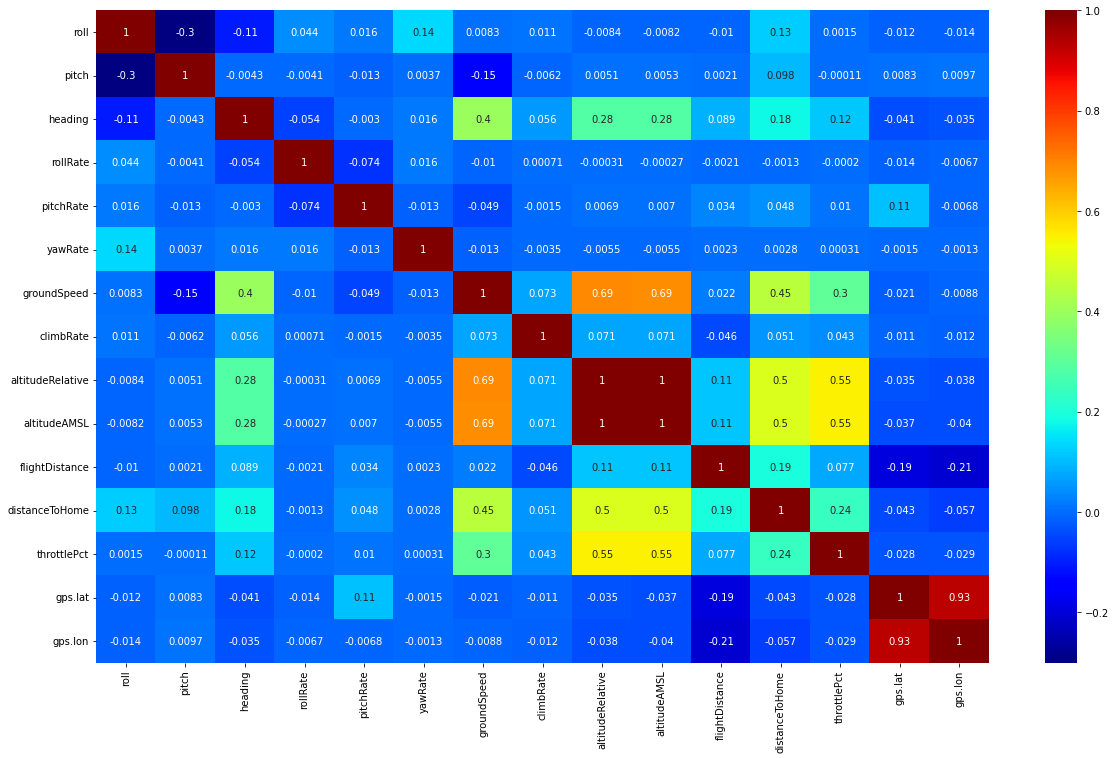

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop(['airSpeed'], axis=1).corr(), annot=True, cmap='jet')

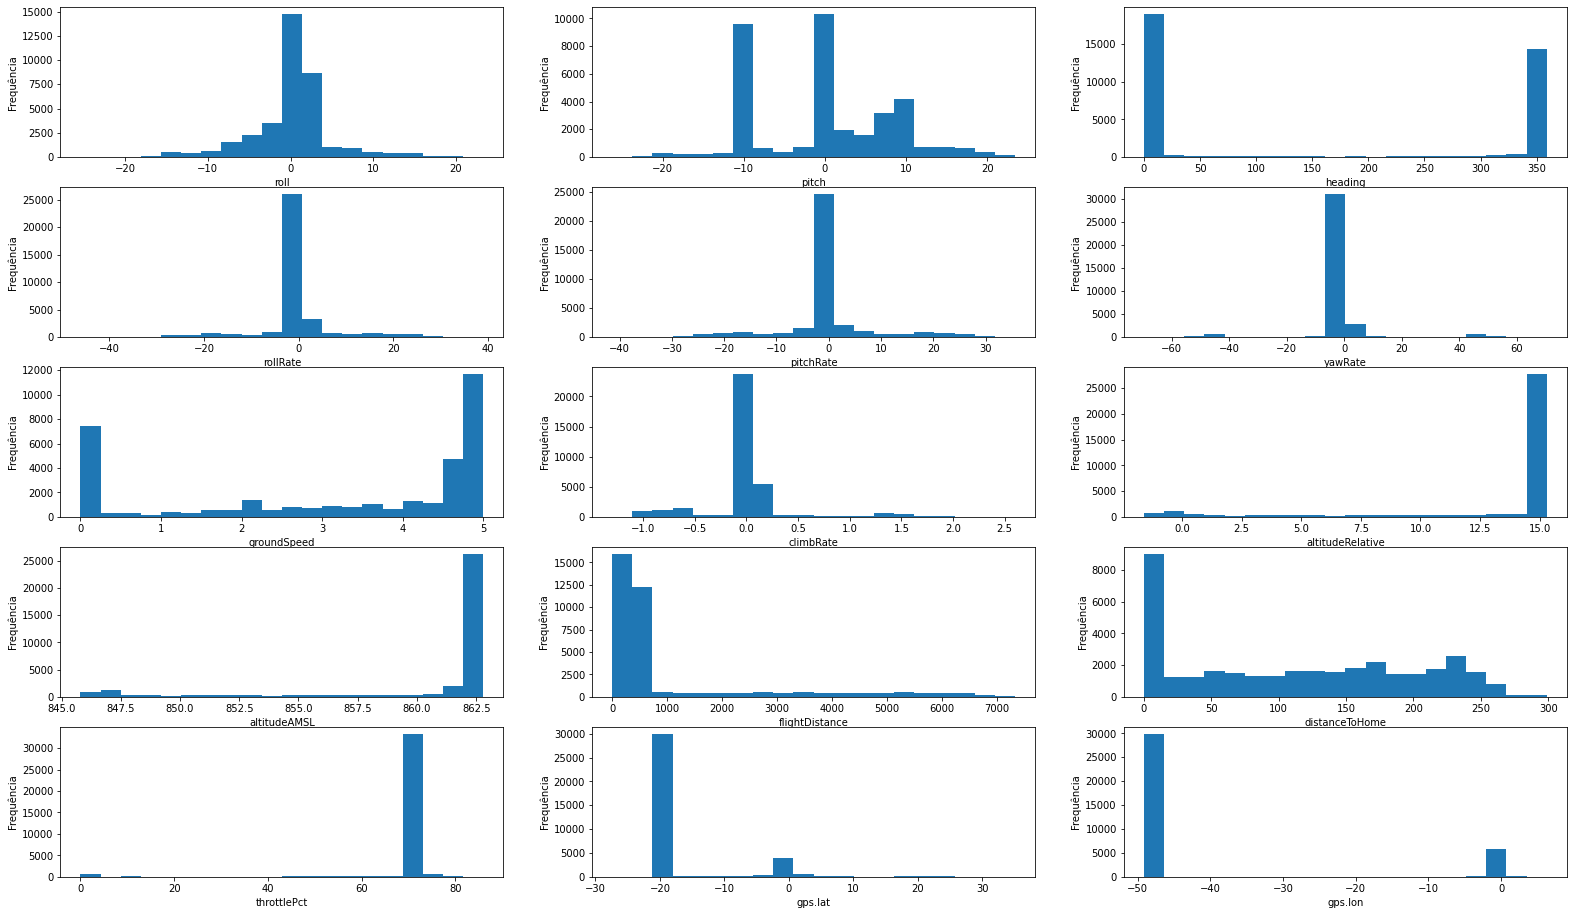

In [19]:
contColNames = list(df.drop(['airSpeed'], axis=1).select_dtypes(include='number').columns) #-> seleciona apenas colunas numéricas
ncols = 3 #-> número de colunas que armazenarão os plots na figure 
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #-> número de linhas que armazenarão os plots na figure 


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(27,16))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df.drop(['airSpeed'], axis=1).select_dtypes(include='number')[contColNames[counter]], bins=20)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

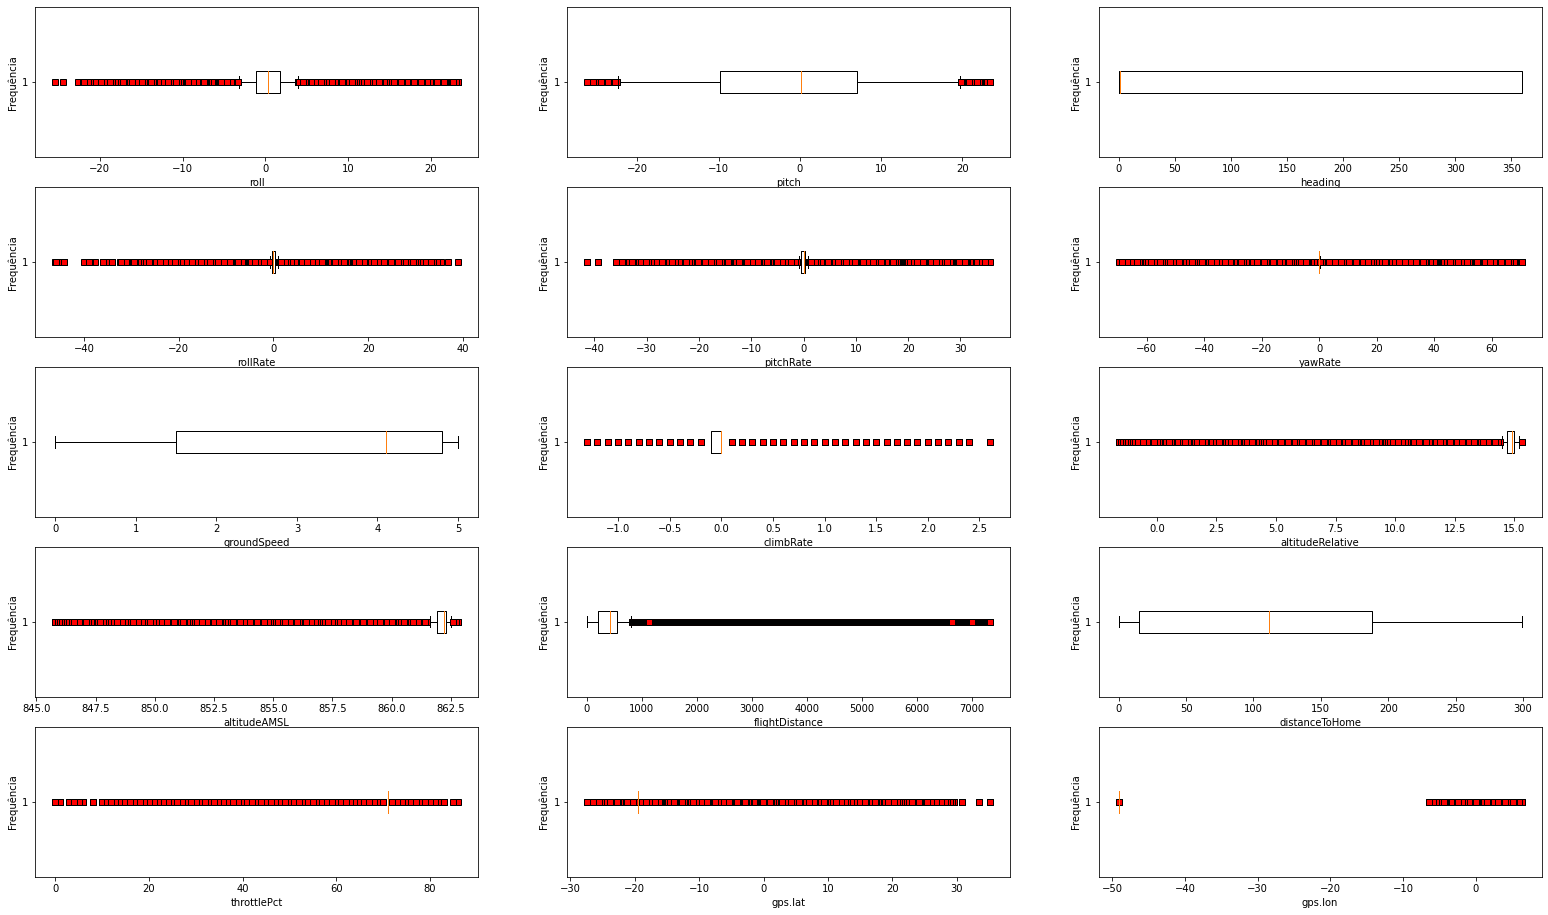

In [20]:
contColNames = list(df.drop(['airSpeed'], axis=1).select_dtypes(include='number').columns) #-> seleciona apenas colunas numéricas
ncols = 3 #-> número de colunas que armazenarão os plots na figure 
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #-> número de linhas que armazenarão os plots na figure 


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(27,16))

counter = 0 

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(contColNames):
      red_square = dict(markerfacecolor='r', marker='s')
      ax.boxplot(df.drop(['airSpeed'], axis=1).select_dtypes(include='number')[contColNames[counter]], flierprops=red_square, vert=False, whis=0.75)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


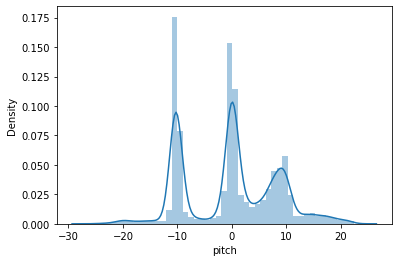

In [21]:
sns.distplot(df.pitch)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


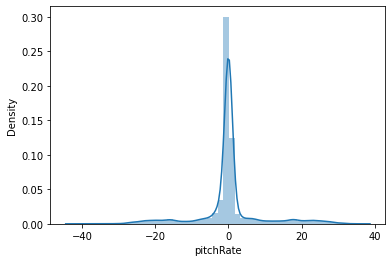

In [22]:
sns.distplot(df.pitchRate)

In [23]:
import plotly.express as px
fig = px.scatter_3d(df, x='rollRate', y='pitchRate', z='yawRate', color='climbRate', color_continuous_scale='inferno')
fig.show()

# 3- Anomaly Detection (LSTM)

> Specific Libraries

In [24]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Conv1D
import time

> Selecting Features

In [25]:
df_reduced = df.pipe(select_columns, ['rollRate', 'pitchRate', 'yawRate'])
df_reduced

rollRate  pitchRate  yawRate
0          -0.1        0.1      0.1
1          -0.1        0.1      0.0
2          -0.2       -0.0     -0.0
3          10.6        4.2      0.2
4          -0.9       -0.3     -0.1
...         ...        ...      ...
35994      -0.0        0.2     -0.1
35995      -0.1        0.2      0.1
35996      -0.0       -0.0      0.0
35997      -0.0       -0.1      0.1
35998      -0.1        0.1      0.1

[35999 rows x 3 columns]

> Feature Scaling

In [26]:
#Preparing the data for LSTM model
data_n = df_reduced
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_n)
data_n = pd.DataFrame(np_scaled)
data_n

0         1         2
0     -0.016924 -0.013431  0.005420
1     -0.016924 -0.013431 -0.003973
2     -0.030466 -0.025419 -0.003973
3      1.431965  0.478076  0.014813
4     -0.125253 -0.061383 -0.013366
...         ...       ...       ...
35994 -0.003383 -0.001443 -0.013366
35995 -0.016924 -0.001443  0.005420
35996 -0.003383 -0.025419 -0.003973
35997 -0.003383 -0.037407  0.005420
35998 -0.016924 -0.013431  0.005420

[35999 rows x 3 columns]

> Principal Component Analysis (PCA)

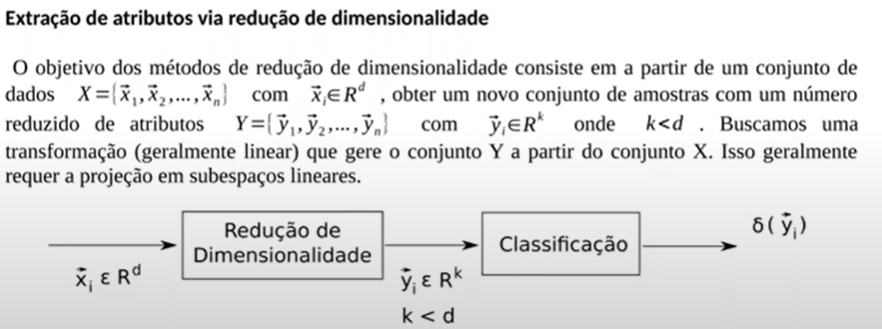


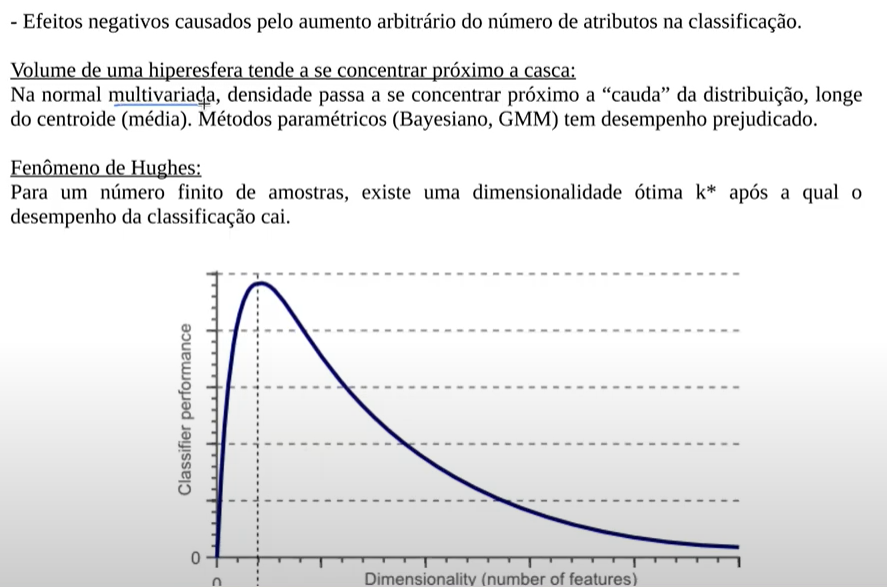

In [27]:
df_pca_input = df.pipe(select_columns, ['roll','pitch','heading','rollRate','pitchRate','yawRate','climbRate','groundSpeed'])
df_pca_input

roll  pitch  heading  rollRate  pitchRate  yawRate  climbRate  \
0      -0.5   -0.3        0      -0.1        0.1      0.1        0.0   
1      -0.5   -0.3        0      -0.1        0.1      0.0        0.0   
2      -0.5   -0.3        0      -0.2       -0.0     -0.0        0.0   
3       1.0   -0.1        0      10.6        4.2      0.2        0.0   
4      -1.0   -0.6        0      -0.9       -0.3     -0.1        0.8   
...     ...    ...      ...       ...        ...      ...        ...   
35994  -0.1    0.4        0      -0.0        0.2     -0.1       -0.2   
35995  -0.1    0.4        0      -0.1        0.2      0.1       -0.1   
35996  -0.1    0.4        0      -0.0       -0.0      0.0       -0.1   
35997  -0.1    0.4        0      -0.0       -0.1      0.1       -0.0   
35998  -0.1    0.4      359      -0.1        0.1      0.1       -0.0   

       groundSpeed  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.1  
...            ...  
35994          0.0  
35995          0.0  
35996          0.0  
35997          0.0  
35998          0.0  

[35999 rows x 8 columns]

In [28]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_pca_input)
data_scaled_pca = pd.DataFrame(np_scaled)
data_scaled_pca

0         1         2         3         4         5         6  \
0     -0.115146 -0.005828 -0.904911 -0.016924 -0.013431  0.005420  0.035840   
1     -0.115146 -0.005828 -0.904911 -0.016924 -0.013431 -0.003973  0.035840   
2     -0.115146 -0.005828 -0.904911 -0.030466 -0.025419 -0.003973  0.035840   
3      0.197020  0.017643 -0.904911  1.431965  0.478076  0.014813  0.035840   
4     -0.219201 -0.041035 -0.904911 -0.125253 -0.061383 -0.013366  1.949038   
...         ...       ...       ...       ...       ...       ...       ...   
35994 -0.031901  0.076321 -0.904911 -0.003383 -0.001443 -0.013366 -0.442459   
35995 -0.031901  0.076321 -0.904911 -0.016924 -0.001443  0.005420 -0.203310   
35996 -0.031901  0.076321 -0.904911 -0.003383 -0.025419 -0.003973 -0.203310   
35997 -0.031901  0.076321 -0.904911 -0.003383 -0.037407  0.005420  0.035840   
35998 -0.031901  0.076321  1.162220 -0.016924 -0.013431  0.005420  0.035840   

              7  
0     -1.627685  
1     -1.627685  
2     -1.627685  
3     -1.627685  
4     -1.576146  
...         ...  
35994 -1.627685  
35995 -1.627685  
35996 -1.627685  
35997 -1.627685  
35998 -1.627685  

[35999 rows x 8 columns]

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(data_scaled_pca)

PCA(n_components=3)

In [30]:
df_pca = pca.transform(data_scaled_pca)
df_pca

array([[ 1.6960354 ,  0.14866474, -0.08688826],
       [ 1.69608784,  0.14614032, -0.08837306],
       [ 1.69431799,  0.14403228, -0.08876931],
       ...,
       [ 1.76204393,  0.15969706, -0.07329537],
       [ 1.71426378,  0.15988143, -0.05241916],
       [ 0.39013692, -0.3209974 , -0.09117905]])

> LSTM Model

In [31]:
#Important parameters and training/Test size
prediction_time = 1 
# testdatasize = 540 
# testdatasize = 4325 
testdatasize = 8800
unroll_length = 180
testdatacut = testdatasize + unroll_length  + 1

#Training data
# X_train = data_n[0 : -9024].values   #selects all 5 columns
X_train = data_scaled_pca[0 : (-prediction_time - testdatacut)].values   #selects all 5 columns

# y_train = data_n[1 : -9023][0].values #targeted the "value" column as main feature
y_train = data_scaled_pca[prediction_time : -testdatacut][0].values #targeted the "value" column as main feature

#Test data
# X_test = data_n[-9023 : -1].values
X_test = data_scaled_pca[ (0-testdatacut) : -prediction_time].values

# y_test = data_n[-9022 : ][0].values
y_test = data_scaled_pca[(prediction_time - testdatacut) : ][0].values


#Shape of the data
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (27017, 8)
y_train (27017,)
x_test (8980, 8)
y_test (8980,)


In [32]:
sz = X_train.shape[0] + X_test.shape[0]

print(f'Train relation: {(X_train.shape[0]/sz)*100}% of the data')
print(f'Test relation: {(X_test.shape[0]/sz)*100}% of the data')

Train relation: 75.05347667861211% of the data
Test relation: 24.946523321387893% of the data


In [33]:
def unroll(data,sequence_length=180):  #sequence_length=24
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

#Adapt the datasets for the sequence data shape
X_train = unroll(X_train,unroll_length)
X_test  = unroll(X_test,unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test  = y_test[-X_test.shape[0]:]


#Shape of the data
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (26837, 180, 8)
y_train (26837,)
X_test (8800, 180, 8)
y_test (8800,)


In [34]:
X_test

array([[[ 0.25945363, -1.17938531,  1.1622203 , ..., -0.00397258,
          0.03584024,  0.64004629],
        [ 0.25945363, -1.20285646,  1.1622203 , ..., -0.01336562,
          0.03584024,  0.69158564],
        [ 0.25945363, -1.21459204,  1.1622203 , ..., -0.00397258,
          0.03584024,  0.74312498],
        ...,
        [ 0.67567506, -2.45856294, -0.90491054, ..., -0.02275866,
          0.27499001,  0.17619216],
        [ 0.32188685, -0.93293825, -0.90491054, ..., -0.06972384,
          0.03584024,  0.69158564],
        [ 0.46756435, -1.15591416,  1.1622203 , ...,  0.00542045,
          0.03584024,  0.64004629]],

       [[ 0.25945363, -1.20285646,  1.1622203 , ..., -0.01336562,
          0.03584024,  0.69158564],
        [ 0.25945363, -1.21459204,  1.1622203 , ..., -0.00397258,
          0.03584024,  0.74312498],
        [ 0.30107577, -1.21459204, -0.90491054, ..., -0.03215169,
          0.03584024,  0.79466433],
        ...,
        [ 0.32188685, -0.93293825, -0.90491054, ..., -

In [35]:
y_test

array([ 0.4259422 ,  0.44675327,  0.4259422 , ..., -0.03190137,
       -0.03190137, -0.03190137])

> Train

In [36]:
#Building the model
model = Sequential()

# model.add(LSTM(units=180, input_dim=x_train.shape[-1], return_sequences=True))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=180, input_dim=X_train.shape[-1], return_sequences=False)))
model.add(Dropout(0.2))

# model.add(LSTM(360, return_sequences=False))
# model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.010078668594360352


---
---
---

>> Visualização da Rede

In [37]:
!pip3 install ann_visualizer #https://github.com/RedaOps/ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=3870201f35dfd9d5e259e18a6095698a5955808f18c0ebe91877cc6872132a37
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [38]:
network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=180,
                  activation='relu',
                  input_dim=X_train.shape[-1]));


        #Exit Layer
network.add(Dense(units=1,
                  activation='linear',
                  kernel_initializer='uniform'));

from ann_visualizer.visualize import ann_viz;

ann_viz(network, title="");

from ann_visualizer.visualize import ann_viz

ann_viz(network, title="LSTM") # Visualização da Rede com ANN Visualizer: compatível apenas com objetos do Keras (https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e)

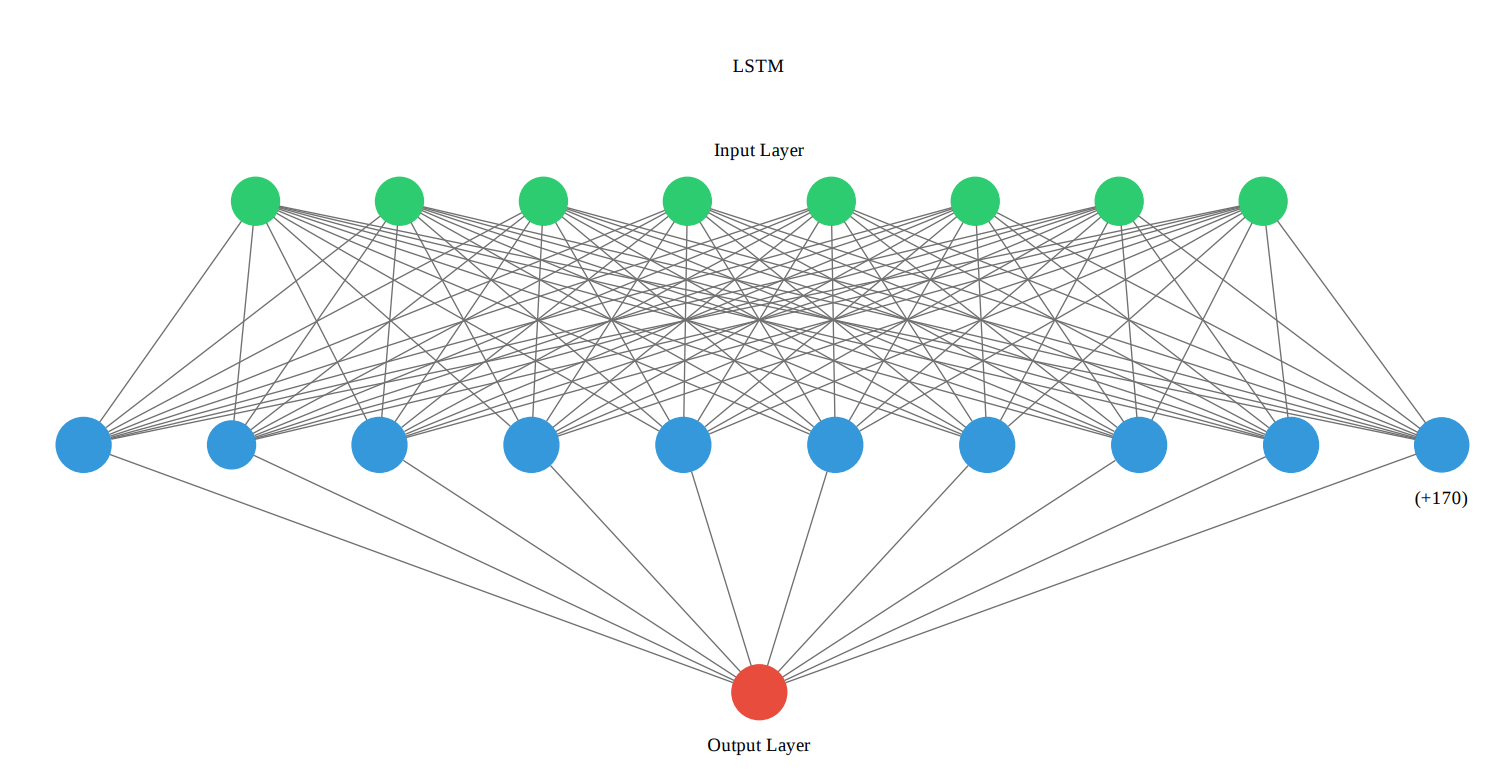

---
---
---

In [ ]:
model.fit(X_train, y_train, batch_size=int(0.5*len(df)), epochs=30, validation_split=0.1)

Epoch 1/30


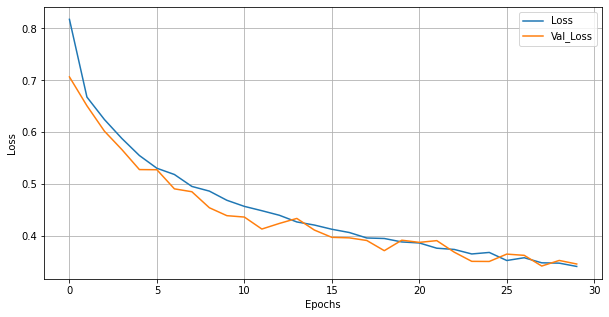

In [ ]:
#Visualizing training and validaton loss
plt.figure(figsize = (10, 5))
plt.plot(model.history.history['loss'], label = 'Loss')
plt.plot(model.history.history['val_loss'], Label = 'Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

> Prediction (Test)

In [ ]:
#creating the list of difference between prediction and test data
loaded_model = model
diff=[]
ratio=[]  
p = loaded_model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

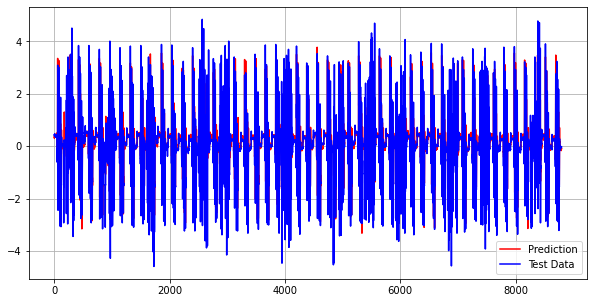

In [ ]:
#Plotting the prediction and the reality (for the test data)
plt.figure(figsize = (10, 5))
plt.plot(p,color='red', label='Prediction')
plt.plot(y_test,color='blue', label='Test Data')
plt.legend(loc='upper left')
plt.grid()
plt.legend()

In [ ]:
# Anomaly estimated population
outliers_fraction = 0.25

#Pick the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

#Data with anomaly label
test = (diff >= threshold).astype(int)
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
df['anomaly27'] = complement.append(test, ignore_index='True')
print(df['anomaly27'].value_counts())

0    33799
1     2200
Name: anomaly27, dtype: int64


In [ ]:
df.columns

Index(['roll', 'pitch', 'heading', 'rollRate', 'pitchRate', 'yawRate',
       'groundSpeed', 'airSpeed', 'climbRate', 'altitudeRelative',
       'altitudeAMSL', 'flightDistance', 'flightTime', 'distanceToHome',
       'headingToNextWP', 'headingToHome', 'throttlePct', 'gps.lat', 'gps.lon',
       'anomaly27'],
      dtype='object')

In [ ]:
df.head()

roll  pitch  heading  rollRate  pitchRate  yawRate  groundSpeed  airSpeed  \
0  -0.5   -0.3        0      -0.1        0.1      0.1          0.0       0.0   
1  -0.5   -0.3        0      -0.1        0.1      0.0          0.0       0.0   
2  -0.5   -0.3        0      -0.2       -0.0     -0.0          0.0       0.0   
3   1.0   -0.1        0      10.6        4.2      0.2          0.0       0.0   
4  -1.0   -0.6        0      -0.9       -0.3     -0.1          0.1       0.0   

   climbRate  altitudeRelative  altitudeAMSL  flightDistance flightTime  \
0        0.0               0.0         847.3             0.0   00:00:00   
1        0.0               0.0         847.3             0.0   00:00:00   
2        0.0               0.0         847.3             0.0   00:00:00   
3        0.0               0.1         847.3             0.0   00:00:01   
4        0.8               0.6         847.9             0.0   00:00:02   

   distanceToHome headingToNextWP headingToHome  throttlePct    gps.lat  \
0             0.0           --.--         --.--            0 -19.467929   
1             0.0           --.--         --.--           20 -19.467929   
2             0.0           --.--         --.--           50 -19.467929   
3             0.0           --.--         --.--           70 -19.467929   
4             0.1           --.--         --.--           74 -19.467929   

     gps.lon  anomaly27  
0 -49.143789          0  
1 -49.143789          0  
2 -49.143789          0  
3 -49.143789          0  
4 -49.143788          0

In [ ]:
def anomaly_val(data, var):
  pos = []
  val =[]
  for i in range(0, len(data)):
    if data.anomaly27[i] == 1:
      pos.append(i)
      val.append(data[var][i])
  
  print('\n',var,':')
  print(f'\nPos: {pos}',f'\nVal: {val}')
  print('\n\n')
  
  return pos, val


rollRate = anomaly_val(df, 'rollRate')
pitchRate = anomaly_val(df, 'pitchRate')
yawRate = anomaly_val(df, 'yawRate')


 rollRate :

Pos: [27247, 27248, 27257, 27261, 27263, 27264, 27265, 27282, 27283, 27285, 27289, 27306, 27307, 27308, 27311, 27315, 27321, 27323, 27361, 27362, 27363, 27364, 27365, 27366, 27367, 27368, 27369, 27370, 27372, 27373, 27401, 27402, 27403, 27405, 27406, 27407, 27408, 27409, 27410, 27411, 27413, 27414, 27416, 27418, 27422, 27424, 27431, 27432, 27433, 27434, 27437, 27438, 27439, 27440, 27441, 27445, 27447, 27448, 27449, 27450, 27451, 27453, 27462, 27463, 27464, 27465, 27467, 27468, 27469, 27474, 27476, 27477, 27478, 27479, 27480, 27483, 27484, 27486, 27487, 27489, 27500, 27502, 27503, 27504, 27505, 27506, 27507, 27508, 27509, 27511, 27512, 27513, 27518, 27519, 27521, 27522, 27524, 27527, 27528, 27529, 27530, 27531, 27532, 27533, 27534, 27535, 27538, 27539, 27541, 27556, 27608, 27610, 27612, 27617, 27618, 27619, 27621, 27622, 27626, 27637, 27651, 27652, 27653, 27658, 27670, 27671, 27672, 27676, 27677, 27684, 27690, 27797, 27802, 27806, 27817, 27824, 27831, 27832, 27833, 27849, 

> Exporting Model

In [ ]:
import joblib
filename = "LSTM_predictions.joblib"
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://0bac31e4-952a-4131-8fa0-a52eef237bba/assets


['LSTM_predictions.joblib']

In [ ]:
loaded_LSTM = joblib.load(filename)
loaded_LSTM

In [ ]:
y_pred = loaded_LSTM.predict(X_test)

In [ ]:
y_pred

array([[-0.04094984],
       [-0.02459889],
       [-0.03095335],
       ...,
       [ 0.01440062],
       [ 0.01917913],
       [ 0.02084419]], dtype=float32)

# Teste 1

In [ ]:
import joblib
filename = "LSTM_predictions.joblib"

loaded_LSTM = joblib.load(filename)
loaded_LSTM

In [ ]:
#creating the list of difference between prediction and test data
loaded_model = loaded_LSTM
diff=[]
ratio=[]  
p = loaded_model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

In [ ]:
# Anomaly estimated population
outliers_fraction = 0.25

#Pick the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

#Data with anomaly label
test = (diff >= threshold).astype(int)
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
df['anomaly27'] = complement.append(test, ignore_index='True')
print(df['anomaly27'].value_counts())

0    33799
1     2200
Name: anomaly27, dtype: int64


In [ ]:
df.columns

Index(['roll', 'pitch', 'heading', 'rollRate', 'pitchRate', 'yawRate',
       'groundSpeed', 'airSpeed', 'climbRate', 'altitudeRelative',
       'altitudeAMSL', 'flightDistance', 'flightTime', 'distanceToHome',
       'headingToNextWP', 'headingToHome', 'throttlePct', 'gps.lat', 'gps.lon',
       'anomaly27'],
      dtype='object')

In [ ]:
def anomaly_val(data, var):
  pos = []
  val =[]
  for i in range(0, len(data)):
    if data.anomaly27[i] == 1:
      pos.append(i)
      val.append(data[var][i])
  
  print('\n',var,':')
  print(f'\nPos: {pos}',f'\nVal: {val}')
  print('\n\n')
  
  return pos, val


roll = anomaly_val(df, 'roll')
pitch = anomaly_val(df, 'pitch')
yawRate = anomaly_val(df, 'yawRate')


 roll :

Pos: [27246, 27251, 27256, 27257, 27270, 27276, 27277, 27278, 27280, 27284, 27289, 27290, 27291, 27297, 27299, 27305, 27307, 27308, 27309, 27311, 27312, 27313, 27314, 27315, 27322, 27329, 27361, 27362, 27363, 27364, 27365, 27369, 27406, 27407, 27408, 27409, 27410, 27411, 27412, 27414, 27415, 27416, 27417, 27418, 27422, 27431, 27432, 27436, 27437, 27439, 27440, 27444, 27445, 27447, 27450, 27451, 27464, 27466, 27474, 27475, 27476, 27477, 27479, 27480, 27481, 27482, 27483, 27486, 27488, 27489, 27490, 27495, 27496, 27497, 27500, 27503, 27504, 27506, 27508, 27509, 27510, 27511, 27512, 27513, 27518, 27520, 27521, 27523, 27524, 27525, 27526, 27527, 27528, 27529, 27530, 27531, 27532, 27533, 27534, 27535, 27536, 27537, 27538, 27539, 27556, 27609, 27618, 27619, 27625, 27627, 27636, 27637, 27638, 27642, 27644, 27645, 27647, 27648, 27649, 27652, 27655, 27658, 27659, 27660, 27662, 27664, 27667, 27668, 27669, 27670, 27671, 27672, 27676, 27677, 27678, 27685, 27688, 27690, 27691, 27722, 2773

In [ ]:
import os 
os.makedirs('folder/subfolder', exist_ok=True)

In [ ]:
df2 = df.to_csv('folder/subfolder/out.csv',index=False)

# Teste 2

Referências:

https://stackoverflow.com/questions/67100929/lstm-valueerror-input-0-of-layer-sequential-is-incompatible-with-the-layer-ex

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

## Abordagem 1

In [ ]:
import joblib
filename = "LSTM_predictions.joblib"

loaded_LSTM = joblib.load(filename)
loaded_LSTM

In [ ]:
import numpy as np
x_inst =  np.array([[
                 [1,24,50],
                ]])
x_inst.shape

(1, 1, 3)

In [ ]:
y_inst = loaded_LSTM.predict(x_inst)
y_inst

array([[-2.7792842]], dtype=float32)

## Abordagem 2

In [ ]:
X_test.shape

(8800, 180, 3)

In [ ]:
import numpy as np
x_inst = np.zeros([8800, 180, 3])
x_inst[0][0] = [1,2,3]
x_inst

array([[[1., 2., 3.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
y_inst = np.zeros([8800,])
y_inst[0],y_inst[1],y_inst[2] = 1,2,3
y_inst

array([1., 2., 3., ..., 0., 0., 0.])

In [ ]:
import joblib
filename = "LSTM_predictions.joblib"

loaded_LSTM = joblib.load(filename)
loaded_LSTM

In [ ]:
#creating the list of difference between prediction and test data
diff=[]
ratio=[]  
p = loaded_LSTM.predict(x_inst)
for u in range(len(y_inst)):
    pr = p[u][0]
    ratio.append((y_inst[u]/pr)-1)
    diff.append(abs(y_inst[u]- pr))

In [ ]:
val_1 = list(np.zeros(len(df)))
val_1[0]= 1 

val_2 = list(np.zeros(len(df)))
val_2[0] = 2 

val_3 = list(np.zeros(len(df)))
val_3[0] = 3 

df2 = pd.DataFrame({'a':val_1, 'b': val_2, 'c':val_3})
df2

a    b    c
0      1.0  2.0  3.0
1      0.0  0.0  0.0
2      0.0  0.0  0.0
3      0.0  0.0  0.0
4      0.0  0.0  0.0
...    ...  ...  ...
35994  0.0  0.0  0.0
35995  0.0  0.0  0.0
35996  0.0  0.0  0.0
35997  0.0  0.0  0.0
35998  0.0  0.0  0.0

[35999 rows x 3 columns]

In [ ]:
# Anomaly estimated population
outliers_fraction = 0.25

#Pick the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction*len(diff))
threshold = diff.nlargest(number_of_outliers).min()

#Data with anomaly label
test = (diff >= threshold).astype(int)
complement = pd.Series(0, index=np.arange(len(data_n)-testdatasize))
df2['anomaly27'] = complement.append(test, ignore_index='True')
print(df2['anomaly27'].value_counts())

0    27749
1     8250
Name: anomaly27, dtype: int64


# 4- Interpretabilidade

## .

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df2 = pd.read_csv('out.csv')
df2.head()

roll  pitch  heading  rollRate  pitchRate  yawRate  groundSpeed  airSpeed  \
0  -0.5   -0.3        0      -0.1        0.1      0.1          0.0       0.0   
1  -0.5   -0.3        0      -0.1        0.1      0.0          0.0       0.0   
2  -0.5   -0.3        0      -0.2       -0.0     -0.0          0.0       0.0   
3   1.0   -0.1        0      10.6        4.2      0.2          0.0       0.0   
4  -1.0   -0.6        0      -0.9       -0.3     -0.1          0.1       0.0   

   climbRate  altitudeRelative  altitudeAMSL  flightDistance flightTime  \
0        0.0               0.0         847.3             0.0   00:00:00   
1        0.0               0.0         847.3             0.0   00:00:00   
2        0.0               0.0         847.3             0.0   00:00:00   
3        0.0               0.1         847.3             0.0   00:00:01   
4        0.8               0.6         847.9             0.0   00:00:02   

   distanceToHome headingToNextWP headingToHome  throttlePct    gps.lat  \
0             0.0           --.--         --.--            0 -19.467929   
1             0.0           --.--         --.--           20 -19.467929   
2             0.0           --.--         --.--           50 -19.467929   
3             0.0           --.--         --.--           70 -19.467929   
4             0.1           --.--         --.--           74 -19.467929   

     gps.lon  anomaly27  
0 -49.143789          0  
1 -49.143789          0  
2 -49.143789          0  
3 -49.143789          0  
4 -49.143788          0

In [ ]:
rows_test = 8980
new_dimensionality = len(df2) - rows_test


df_classifier = df2.tail(new_dimensionality)
df_classifier.head()

roll  pitch  heading  rollRate  pitchRate  yawRate  groundSpeed  \
8980  -0.7    0.2        0      -0.1       -0.3      0.0          0.0   
8981  -0.6    0.3        0       0.2        0.2     -0.0          0.0   
8982  -0.6    0.3        0      -0.1        0.2     -0.1          0.0   
8983  -0.6    0.3        0      -0.1       -0.2     -0.1          0.0   
8984  -0.7    0.2        0       0.3        0.1      0.0          0.0   

      airSpeed  climbRate  altitudeRelative  altitudeAMSL  flightDistance  \
8980       0.0       -0.8               6.5         853.7           546.6   
8981       0.0       -0.7               5.7         853.0           546.6   
8982       0.0       -0.7               5.0         852.2           546.6   
8983       0.0       -0.7               4.3         851.5           546.6   
8984       0.0       -0.7               3.6         850.8           546.6   

     flightTime  distanceToHome headingToNextWP headingToHome  throttlePct  \
8980   00:02:39             0.2             224         --.--           72   
8981   00:02:40             0.1             224         --.--           72   
8982   00:02:41             0.2             224         --.--           71   
8983   00:02:42             0.1             224         --.--           71   
8984   00:02:43             0.1             224         --.--           71   

      gps.lat  gps.lon  anomaly27  
8980     -0.1      0.0          0  
8981      0.1     -0.0          0  
8982      0.1     -0.0          0  
8983     -0.1     -0.0          0  
8984      0.1      0.0          0

In [ ]:
df_classifier = df_classifier[['rollRate','pitchRate','yawRate','anomaly27']]
df_classifier

rollRate  pitchRate  yawRate  anomaly27
8980       -0.1       -0.3      0.0          0
8981        0.2        0.2     -0.0          0
8982       -0.1        0.2     -0.1          0
8983       -0.1       -0.2     -0.1          0
8984        0.3        0.1      0.0          0
...         ...        ...      ...        ...
35994      -0.0        0.2     -0.1          0
35995      -0.1        0.2      0.1          0
35996      -0.0       -0.0      0.0          0
35997      -0.0       -0.1      0.1          0
35998      -0.1        0.1      0.1          0

[27019 rows x 4 columns]

In [ ]:
X = df_classifier.drop(['anomaly27'],axis=1)
y = df_classifier.anomaly27

print(X.head())
print('\n\n')
print(y.head())

      rollRate  pitchRate  yawRate
8980      -0.1       -0.3      0.0
8981       0.2        0.2     -0.0
8982      -0.1        0.2     -0.1
8983      -0.1       -0.2     -0.1
8984       0.3        0.1      0.0



8980    0
8981    0
8982    0
8983    0
8984    0
Name: anomaly27, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21615, 3)
(21615,)
(5404, 3)
(5404,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',n_estimators=500, max_depth=250)
# clf.fit(X_train,y_train)
clf.fit(X,y)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

96.66913397483346

## .

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 8.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c53ce2365bccdcadadffe8110c01f7090745dea9eb4595193c2ba6045568a3c8
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.5 MB/s 


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 6.8 MB/s 


## Anômalo

In [ ]:
print(X_test.iloc[-1])
print('Anomaly: ',y_test.iloc[-20])

rollRate      2.0
pitchRate   -19.8
yawRate      -1.3
Name: 35037, dtype: float64
Anomaly:  1


In [ ]:
import lime  #Doc: https://github.com/marcotcr/lime
import lime.lime_tabular
import numpy as np


explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                   feature_names=X_train.columns,
                                                   class_names=["Normal", "Anomaly"],
                                                   mode='classification')

exp = explainer.explain_instance(X_test.iloc[-20],
                                   clf.predict_proba,
                                   num_features=8,
                                   top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
from eli5 import show_prediction

print("Actual Target Value : ", y_test.iloc[-1])
show_prediction(clf,
                X_test.iloc[-20],
                feature_names=list(X_train.columns),
                show_feature_values=True,
                )

Actual Target Value :  1


## Normal

In [ ]:
print(X_test.iloc[25])
print('Anomaly: ',y_test.iloc[25])

rollRate    -0.2
pitchRate   -0.3
yawRate     -0.2
Name: 30243, dtype: float64
Anomaly:  0


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                   feature_names=X_train.columns,
                                                   class_names=["Normal", "Anomaly"],
                                                   mode='classification')

exp = explainer.explain_instance(X_test.iloc[25],
                                   clf.predict_proba,
                                   num_features=8,
                                   top_labels=1)

exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
print("Actual Target Value : ", y_test.iloc[25])
show_prediction(clf,
                X_test.iloc[25],
                feature_names=list(X_train.columns),
                show_feature_values=True,
                )

Actual Target Value :  0


## Randômico

In [ ]:
import random
rand = random.randint(1, len(X_test))

print(rand)
print(X_test.iloc[rand])
print('Anomaly: ',y_test.iloc[rand])

1074
rollRate    -0.6
pitchRate    2.5
yawRate      0.2
Name: 29749, dtype: float64
Anomaly:  0


In [ ]:
print("Actual Target Value : ", y_test.iloc[rand])
show_prediction(clf,
                X_test.iloc[rand],
                feature_names=list(X_train.columns),
                show_feature_values=True,
                )

Actual Target Value :  0


## Resumidamente

In [ ]:
from eli5.formatters import format_as_html
from IPython.display import HTML
from eli5.sklearn import explain_weights_sklearn

explanation = explain_weights_sklearn(clf, feature_names=list(X_train.columns))
html_rep = format_as_html(explanation)
HTML(data=html_rep)